In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid", {'axes.grid' : False})
# sns.set_style("whitegrid")

# Environment settings: 
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

# import warnings
# # Suppressing a warning 
# warnings.filterwarnings("ignore") 
# warnings.warn("this will not show")

import re
import time
import random
import tempfile
from tqdm.notebook import tqdm

import gc
gc.collect()

8

In [2]:
df_origin_train = pd.read_csv("C:/Doc/Mémoire/Data_cleaned//train.csv")
df_train = df_origin_train.copy()

df_origin_test = pd.read_csv("C://Doc//Mémoire//Data_cleaned//test.csv")
df_test = df_origin_test.copy()

df_train.shape, df_test.shape

((100000, 28), (50000, 27))

In [3]:
df_train.head(6).T

,0,1,2,3,4,5
ID,5634,5635,5636,5637,5638,5639
Customer_ID,3392,3392,3392,3392,3392,3392
Month,1,2,3,4,5,6
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23.000,23.000,23.000,23.000,23.000,23.000
SSN,821000265.000,821000265.000,821000265.000,821000265.000,821000265.000,821000265.000
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.120,19114.120,19114.120,19114.120,19114.120,19114.120
Monthly_Inhand_Salary,1824.843,1824.843,1824.843,1824.843,1824.843,1824.843
Num_Bank_Accounts,3.000,3.000,3.000,3.000,3.000,3.000


In [4]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [5]:
# Supprimer les colonnes non utiles pour le model
df_train.drop(columns=['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], inplace=True)
df_test.drop(columns=['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], inplace=True)

In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.000,33.316,10.765,14.000,24.000,33.000,42.000,56.000
Annual_Income,100000.000,50505.123,38299.422,7005.930,19342.972,36999.705,71683.470,179987.280
Monthly_Inhand_Salary,100000.000,4197.271,3186.432,303.645,1626.594,3095.905,5957.715,15204.633
Num_Bank_Accounts,100000.000,5.369,2.593,0.000,3.000,5.000,7.000,11.000
Num_Credit_Card,100000.000,5.534,2.067,0.000,4.000,5.000,7.000,11.000
Interest_Rate,100000.000,14.532,8.741,1.000,7.000,13.000,20.000,34.000
Num_of_Loan,100000.000,3.533,2.446,0.000,2.000,3.000,5.000,9.000
Delay_from_due_date,100000.000,21.081,14.805,0.000,10.000,18.000,28.000,62.000
Num_of_Delayed_Payment,100000.000,13.313,6.237,0.000,9.000,14.000,18.000,25.000
Changed_Credit_Limit,100000.000,10.470,6.609,0.500,5.380,9.400,14.850,29.980


In [7]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.000,33.804,10.765,14.000,25.000,33.000,42.000,56.000
Annual_Income,50000.000,50505.123,38299.614,7005.930,19342.972,36999.705,71683.470,179987.280
Monthly_Inhand_Salary,50000.000,4183.034,3175.319,303.645,1623.555,3082.272,5937.530,15204.633
Num_Bank_Accounts,50000.000,5.369,2.595,0.000,3.000,5.000,7.000,11.000
Num_Credit_Card,50000.000,5.534,2.072,0.000,4.000,5.000,7.000,11.000
Interest_Rate,50000.000,14.532,8.741,1.000,7.000,13.000,20.000,34.000
Num_of_Loan,50000.000,3.533,2.446,0.000,2.000,3.000,5.000,9.000
Delay_from_due_date,50000.000,21.067,14.806,0.000,10.000,18.000,28.000,62.000
Num_of_Delayed_Payment,50000.000,13.315,6.238,0.000,9.000,14.000,18.000,25.000
Changed_Credit_Limit,50000.000,10.465,6.606,0.500,5.380,9.410,14.810,29.980


In [8]:
df_train.select_dtypes(include="object").describe().T

,count,unique,top,freq
Occupation,100000,15,Lawyer,7096
Type_of_Loan,100000,6261,No Data,11408
Credit_Mix,100000,3,Standard,45848
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,28103
Credit_Score,100000,3,Standard,53174


In [9]:
df_test.select_dtypes(include="object").describe().T

,count,unique,top,freq
Occupation,50000,15,Lawyer,3548
Type_of_Loan,50000,6261,No Data,5704
Credit_Mix,50000,3,Standard,22924
Payment_of_Min_Amount,50000,3,Yes,26158
Payment_Behaviour,50000,6,Low_spent_Small_value_payments,13943


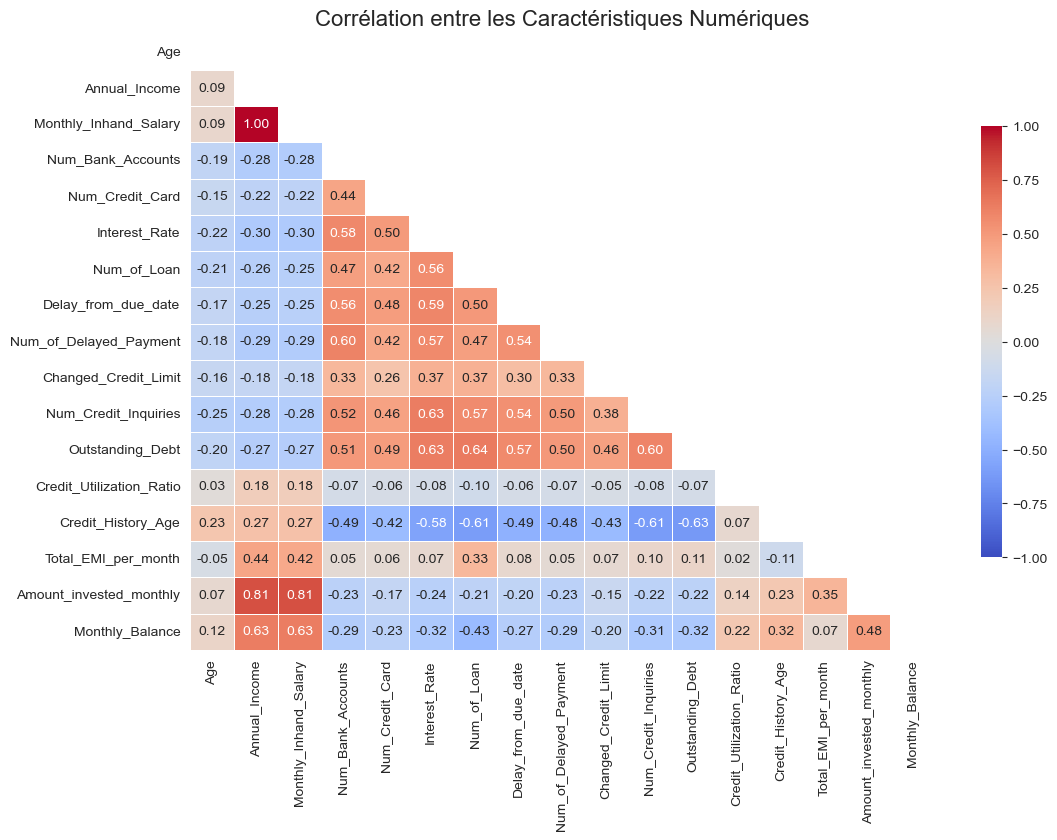

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    data=df_train.corr(),
    mask=np.triu(df_train.corr()),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
)
plt.title("Corrélation entre les Caractéristiques Numériques", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [11]:
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

# Supervised-Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Supervised-Classifier-metrics
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

# Supervised-cross_validate-GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# import pickle

random_state = 42


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

In [13]:
df_train["Credit_Score"].value_counts(normalize=True).sort_index()

Good       0.178
Poor       0.290
Standard   0.532
Name: Credit_Score, dtype: float64

In [29]:
# Séparation des caractéristiques (X) et de la variable cible (y)
X = df_train.drop(columns="Credit_Score")
y = df_train['Credit_Score']
X_test = df_test

# Division des données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Affichage des formes des ensembles de données
data_shapes = {
    "Entraînement (X_train)": X_train.shape,
    "Entraînement (y_train)": y_train.shape,
    "Validation (X_val)": X_val.shape,
    "Validation (y_val)": y_val.shape,
    "Test (X_test)": X_test.shape
}

for data_name, shape in data_shapes.items():
    print(f"{data_name}: {shape}")


Entraînement (X_train): (80000, 22)
Entraînement (y_train): (80000,)
Validation (X_val): (20000, 22)
Validation (y_val): (20000,)
Test (X_test): (50000, 22)


## Label Encoder


In [30]:
from sklearn.preprocessing import LabelEncoder

le      = LabelEncoder()
print(np.unique(y_train))
y_train = le.fit_transform(y_train)
y_val   = le.transform(y_val)

pd.DataFrame(y_train).value_counts().sort_index()

['Good' 'Poor' 'Standard']


0    14301
1    23124
2    42575
dtype: int64

In [31]:
# our focus group
print(le.inverse_transform([0]))
print(le.inverse_transform([1]))
print(le.inverse_transform([2]))

['Good']
['Poor']
['Standard']


## Dummy Operation

In [32]:
def get_dummies_custom(data, data_sep=',', col_name_sep='_'):
    dummy_cols = []
    dummy_prefix = []
    
    for col in data.select_dtypes(include="object").columns:
        if data[col].str.contains(data_sep, regex=True).any():
            dummy_cols.append(col)
            dummy_prefix.append(''.join(map(lambda x: x[0], col.split(col_name_sep))) if col_name_sep in col else col[:2])
    
    for col, pre in zip(dummy_cols, dummy_prefix):
        dummy_df = data[col].str.get_dummies(sep=data_sep).add_prefix(pre+col_name_sep)
        data = pd.concat([data, dummy_df], axis=1)
        data.drop(columns=[col], inplace=True)
    
    return data

In [33]:
X_train_dummy = get_dummies_custom(X_train)
X_val_dummy = get_dummies_custom(X_val)

# Afficher les dimensions des ensembles de données transformés
print("X_train_dummy shape:", X_train_dummy.shape)
print("X_val_dummy shape:", X_val_dummy.shape)

X_train_dummy shape: (80000, 31)
X_val_dummy shape: (20000, 31)


In [34]:
X_train_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 75220 to 15795
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          80000 non-null  float64
 1   Occupation                   80000 non-null  object 
 2   Annual_Income                80000 non-null  float64
 3   Monthly_Inhand_Salary        80000 non-null  float64
 4   Num_Bank_Accounts            80000 non-null  float64
 5   Num_Credit_Card              80000 non-null  float64
 6   Interest_Rate                80000 non-null  float64
 7   Num_of_Loan                  80000 non-null  float64
 8   Delay_from_due_date          80000 non-null  float64
 9   Num_of_Delayed_Payment       80000 non-null  float64
 10  Changed_Credit_Limit         80000 non-null  float64
 11  Num_Credit_Inquiries         80000 non-null  float64
 12  Credit_Mix                   80000 non-null  object 
 13  Outstanding_

In [38]:
from sklearn.preprocessing import OneHotEncoder

cat = X_train_dummy.select_dtypes(include="object").columns.tolist()   
print('OneHotEncoder:', cat)
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_train_cat = pd.DataFrame(
    ohe.fit_transform(X_train_dummy[cat]), index = X_train_dummy.index, 
    columns = ohe.get_feature_names_out(cat)
)    
X_val_cat  = pd.DataFrame(
    ohe.transform(X_val_dummy[cat]), index = X_val_dummy.index, 
    columns = ohe.get_feature_names_out(cat)
)    
X_train_ohe = X_train_cat.join(X_train_dummy.select_dtypes("number"))
X_val_ohe   = X_val_cat.join(X_val_dummy.select_dtypes("number"))

X_train_ohe.shape, X_val_ohe.shape

OneHotEncoder: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


((80000, 54), (20000, 54))

In [39]:
X_train_ohe.columns

Index(['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments', 'Age',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Nu

In [96]:
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_ohe), columns=X_train_ohe.columns)
X_val_scaled   = pd.DataFrame(scaler.transform(X_val_ohe), columns=X_val_ohe.columns)


## Define Model Evaluation Functions


In [155]:
from sklearn.metrics import confusion_matrix, classification_report 

def eval(model, X_train, X_val, y_train=y_train, y_val=y_val):
    print('TEST')
    y_val_pred = model.predict(X_val)
    conf_matrix_val = confusion_matrix(y_val, y_val_pred)
    print(conf_matrix_val)
    print(classification_report(y_val, y_val_pred))
    print("-------------------------------------------------------")
    print('TRAIN')
    y_train_pred = model.predict(X_train)
    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    print(conf_matrix_train)
    print(classification_report(y_train, y_train_pred))
    
    # Heatmap de la matrice de confusion pour les données de validation
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Prédictions')
    plt.ylabel('Vraies valeurs')
    plt.title('Matrice de Confusion (Validation)')

    # Heatmap de la matrice de confusion pour les données d'entraînement
    plt.subplot(122)
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Prédictions')
    plt.ylabel('Vraies valeurs')
    plt.title('Matrice de Confusion (Entraînement)')
    
    plt.tight_layout()
    plt.show()

In [156]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import make_scorer

# for multi-class
scoring = {
    'precision': make_scorer(precision_score, average=None, labels=[1]),
    'recall'   : make_scorer(recall_score, average=None, labels=[1]),
    'f1'       : make_scorer(f1_score, average=None, labels=[1]),
    'accuracy' : make_scorer(accuracy_score),
} 
# Identify people with low credit scores
# recall_1    = make_scorer(recall_score, average = None, labels=[1])
scoring['recall'] 
# log_loss_neg = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

make_scorer(recall_score, average=None, labels=[1])

In [157]:
from sklearn.utils import class_weight

class_weights = dict(
    zip(np.unique(y_train),
        class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(y_train), 
            y = y_train)
))
class_weights

{0: 1.8646714681956973, 1: 1.153203021391916, 2: 0.6263456645136034}

In [158]:
from sklearn.utils import class_weight
sample_weight = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.unique(sample_weight)

array([0.62634566, 1.86467147, 1.15320302])

In [159]:
from collections import Counter

counter = Counter(y_train)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : max_val/count for class_id, count in counter.items()}  
class_weights

{2: 1.0, 0: 2.977064540941193, 1: 1.841160698841031}

In [160]:
pd.value_counts(y_train, normalize=True).sort_index()

0   0.179
1   0.289
2   0.532
dtype: float64

In [161]:
# Step 1: Compute normalized class proportions
class_proportions = pd.value_counts(y_train, normalize=True)

# Step 2: Determine maximum class proportion
max_proportion = class_proportions.max()

# Step 3: Calculate class weights
class_weights = max_proportion / class_proportions
class_weights 

2   1.000
1   1.841
0   2.977
dtype: float64

# Logistic Regression Model

In [162]:

log_reg = LogisticRegression(
    class_weight = "balanced",
    random_state = random_state,
    max_iter     = 10000
)

In [163]:
%%time
log_reg.fit(X_train_scaled, y_train)

Wall time: 30.7 s


LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

LOG MODEL
TEST
[[2939   96  492]
 [ 885 4045  944]
 [2065 2187 6347]]
              precision    recall  f1-score   support

           0       0.50      0.83      0.62      3527
           1       0.64      0.69      0.66      5874
           2       0.82      0.60      0.69     10599

    accuracy                           0.67     20000
   macro avg       0.65      0.71      0.66     20000
weighted avg       0.71      0.67      0.67     20000

-------------------------------------------------------
TRAIN
[[11982   378  1941]
 [ 3692 15799  3633]
 [ 8487  8604 25484]]
              precision    recall  f1-score   support

           0       0.50      0.84      0.62     14301
           1       0.64      0.68      0.66     23124
           2       0.82      0.60      0.69     42575

    accuracy                           0.67     80000
   macro avg       0.65      0.71      0.66     80000
weighted avg       0.71      0.67      0.67     80000



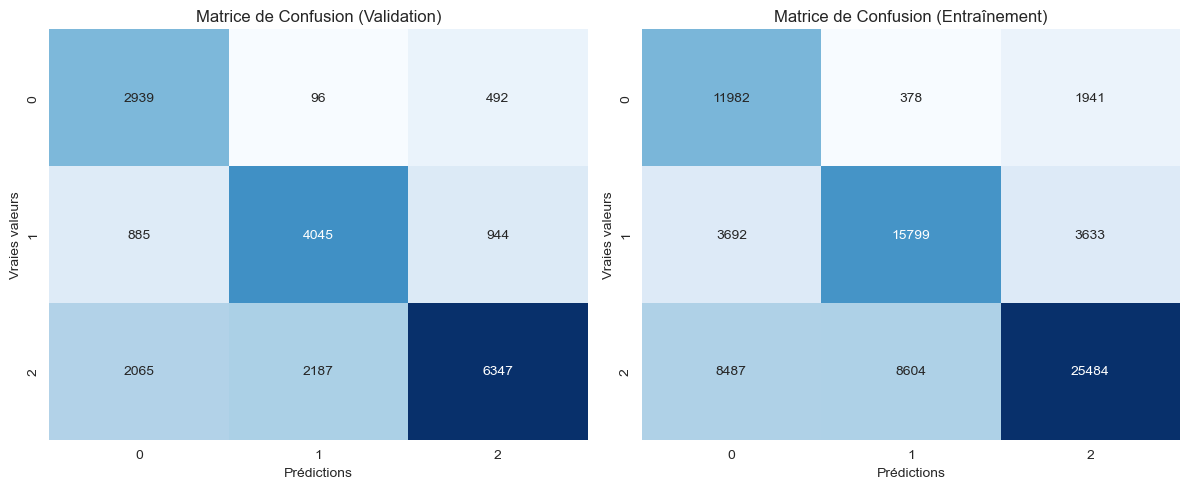

In [164]:
print("LOG MODEL")

eval(log_reg, X_train_scaled, X_val_scaled)

# RandomForestClassifier

In [174]:
import sklearn;

In [175]:
from sklearn.preprocessing import OrdinalEncoder

cat = X_train_dummy.select_dtypes(include="object").columns.to_list()    
print('OrdinalEncoder:', cat) 
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_cat = pd.DataFrame(
    enc.fit_transform(X_train_dummy[cat]), index = X_train_dummy.index, 
    columns = enc.feature_names_in_
)    
X_val_cat  = pd.DataFrame(
    enc.transform(X_val_dummy[cat]), index = X_val_dummy.index, 
    columns = enc.feature_names_in_
)    
X_train_enc = X_train_cat.join(X_train_dummy.select_dtypes("number"))
X_val_enc   = X_val_cat.join(X_val_dummy.select_dtypes("number"))

X_train_enc.shape, X_val_enc.shape

OrdinalEncoder: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


((80000, 31), (20000, 31))

In [176]:
X_train_enc.columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'ToL_No Data', 'ToL_auto loan',
       'ToL_credit-builder loan', 'ToL_debt consolidation loan',
       'ToL_home equity loan', 'ToL_mortgage loan', 'ToL_not specified',
       'ToL_payday loan', 'ToL_personal loan', 'ToL_student loan'],
      dtype='object')

In [177]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    class_weight = 'balanced',
    random_state=random_state
)

In [178]:
%%time
rfc.fit(X_train_enc, y_train)

Wall time: 1min 37s


RandomForestClassifier(class_weight='balanced', random_state=42)

RF MODEL
TEST
[[2722    9  796]
 [  12 4956  906]
 [ 713 1182 8704]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      3527
           1       0.81      0.84      0.82      5874
           2       0.84      0.82      0.83     10599

    accuracy                           0.82     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.82      0.82      0.82     20000

-------------------------------------------------------
TRAIN
[[14301     0     0]
 [    0 23123     1]
 [    0     1 42574]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14301
           1       1.00      1.00      1.00     23124
           2       1.00      1.00      1.00     42575

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



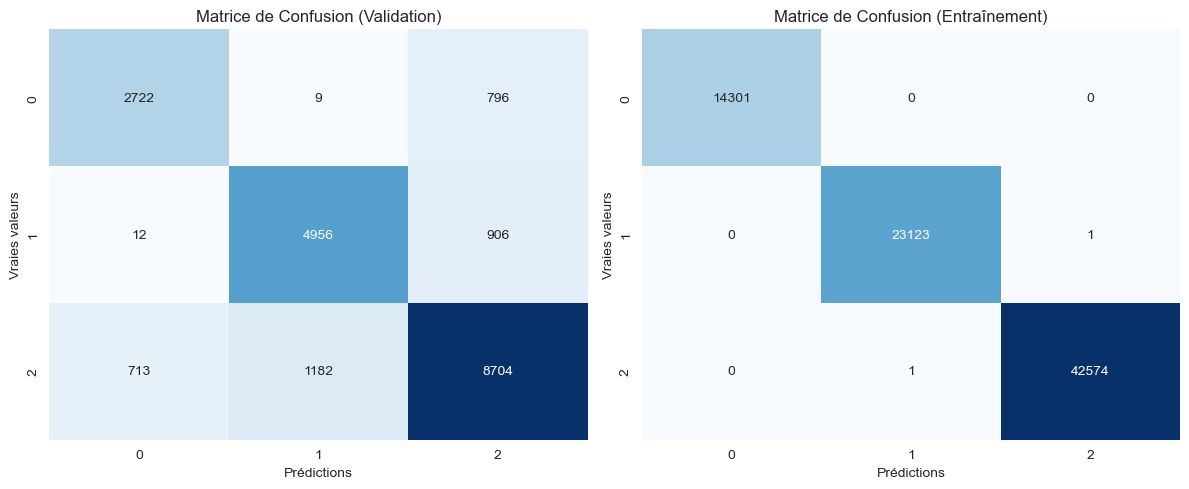

In [179]:
print("RF MODEL")
eval(rfc, X_train_enc, X_val_enc)

# Compare The Models

In [187]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


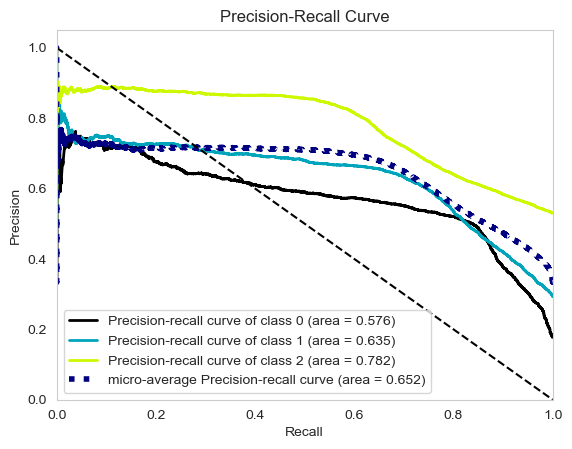

In [189]:
import scikitplot as skplt

y_val_proba = log_reg.predict_proba(X_val_scaled)
skplt.metrics.plot_precision_recall(y_val, y_val_proba);
# skplt.metrics.plot_roc(y_test, y_prob_test)
plt.plot([0, 1],[1, 0], 'k--')
plt.show()

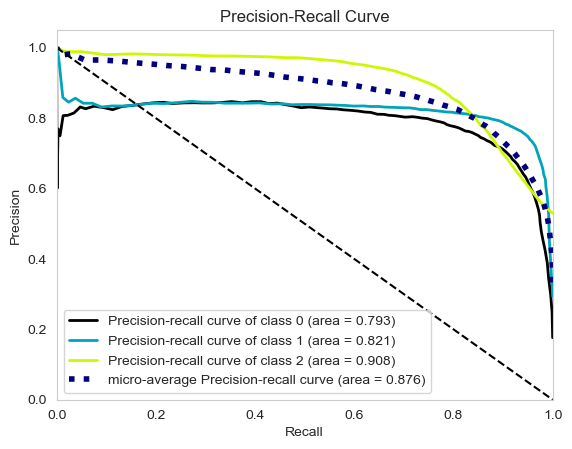

In [190]:
y_val_proba = rfc.predict_proba(X_val_enc)
skplt.metrics.plot_precision_recall(y_val, y_val_proba);
# skplt.metrics.plot_roc(y_test, y_prob_test)
plt.plot([0, 1],[1, 0], 'k--')
plt.show()